# Understand Why Training Unsuccessful

by [Qin Yu](https://github.com/qin-yu)

In [1]:
import numpy as np
import pandas as pd
import h5py
import glob
from pprint import pprint
from skimage.measure import regionprops
import time
import matplotlib.pyplot as plt

In [2]:
def get_files_from_folder(path_folder, ext='h5'):
    pathlist_files = glob.glob(path_folder + '/*.' + ext)
    pprint(pathlist_files)
    return(pathlist_files)

In [3]:
def file_properties(path_file):
    with h5py.File(path_file, 'r') as f:
        if 'label' not in f.keys():
            message_err = "'label' dataset must be included in the input HDF5 file! " + \
                          f"Only found the following keys:\n{f.keys()}"
            raise KeyError(message_err)

        time_start = time.time()
        dset = f['label'][:]
        time_end = time.time()
        print(f"Load time: {time_end - time_start}")

        regs = regionprops(dset)

        # properties = [dset.shape, dset.dtype, ]

    return regs

In [4]:
def region_statistics(regs):
    extents = np.array([np.array(r.bbox[3:]) - np.array(r.bbox[:3]) for r in regs])
    median_extents = np.median(extents, axis=0)
    anisotropy = tuple(np.max(median_extents) / median_extents)
    grid = tuple(1 if a > 1.5 else 2 for a in anisotropy)
    print(f"median extents = {median_extents}, anisotropy = {anisotropy}, grid = {grid}")
    
    areas = np.array([r.area for r in regs])
    return anisotropy, grid, extents, areas

In [5]:
def area_distribution(areas):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
    ax.hist(areas)
    ax.set_title('Number of Pixels')
    
    fig.tight_layout()

In [6]:
def size_distribution(extents):
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))
    dims = ['z', 'y', 'x']

    fig.suptitle("Distribution of Object Sizes")
    for idx in range(3):
        axs[idx].hist(extents[:, idx])
        axs[idx].set_title(dims[idx])

    fig.tight_layout()

# Understand New Datasets

In [7]:
path_folder = "/g/kreshuk/yu/Datasets/TMody2021Ovules/train"
pathlist_files = get_files_from_folder(path_folder, ext='h5')

path_folder = "/g/kreshuk/yu/Datasets/TMody2021Ovules/val"
pathlist_files += get_files_from_folder(path_folder, ext='h5')

['/g/kreshuk/yu/Datasets/TMody2021Ovules/train/1613.h5',
 '/g/kreshuk/yu/Datasets/TMody2021Ovules/train/1614.h5',
 '/g/kreshuk/yu/Datasets/TMody2021Ovules/train/1616.h5',
 '/g/kreshuk/yu/Datasets/TMody2021Ovules/train/1617.h5']
['/g/kreshuk/yu/Datasets/TMody2021Ovules/val/1615.h5']


In [8]:
anisotropy_list = []
grid_list = []
areas_list = []
extents_list = []

for path_file in pathlist_files:
    regs = file_properties(path_file)
    anisotropy, grid, extents, areas = region_statistics(regs)
    
    anisotropy_list.append(anisotropy)
    grid_list.append(grid)
    areas_list.append(areas)
    extents_list.append(extents)

Load time: 3.5259811878204346
median extents = [19. 78. 80.], anisotropy = (4.2105263157894735, 1.0256410256410255, 1.0), grid = (1, 2, 2)
Load time: 6.060052394866943
median extents = [18. 74. 76.], anisotropy = (4.222222222222222, 1.027027027027027, 1.0), grid = (1, 2, 2)
Load time: 5.711355209350586
median extents = [21. 70. 70.], anisotropy = (3.3333333333333335, 1.0, 1.0), grid = (1, 2, 2)
Load time: 4.034212112426758
median extents = [20. 62. 64.], anisotropy = (3.2, 1.032258064516129, 1.0), grid = (1, 2, 2)
Load time: 6.06216025352478
median extents = [20. 68. 76.], anisotropy = (3.8, 1.1176470588235294, 1.0), grid = (1, 2, 2)


In [9]:
range_max = np.max([np.max(areas) for areas in areas_list])

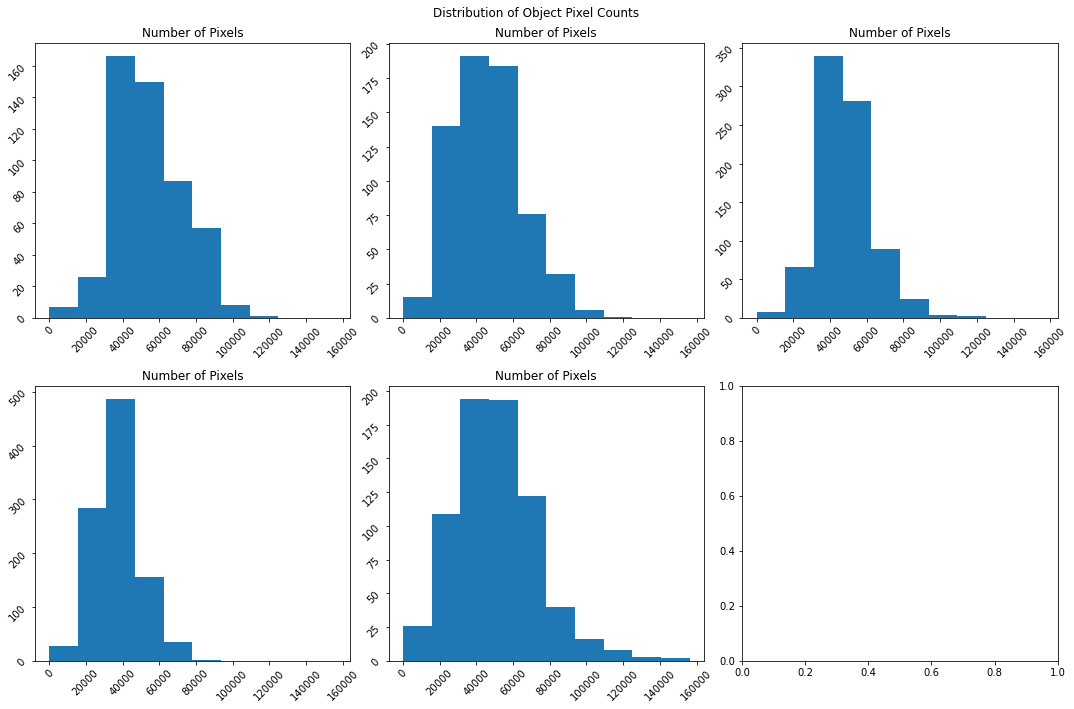

In [10]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

fig.suptitle("Distribution of Object Pixel Counts")
axs = axs.flatten()
for idx, areas in enumerate(areas_list):
    axs[idx].hist(areas, range=(0, range_max))
    axs[idx].set_title('Number of Pixels')
    axs[idx].tick_params(rotation=45)

fig.tight_layout()

In [11]:
range_maxes = [np.max([np.max(extents[:, i]) for extents in extents_list]) for i in range(3)]
range_maxes

[46, 186, 202]

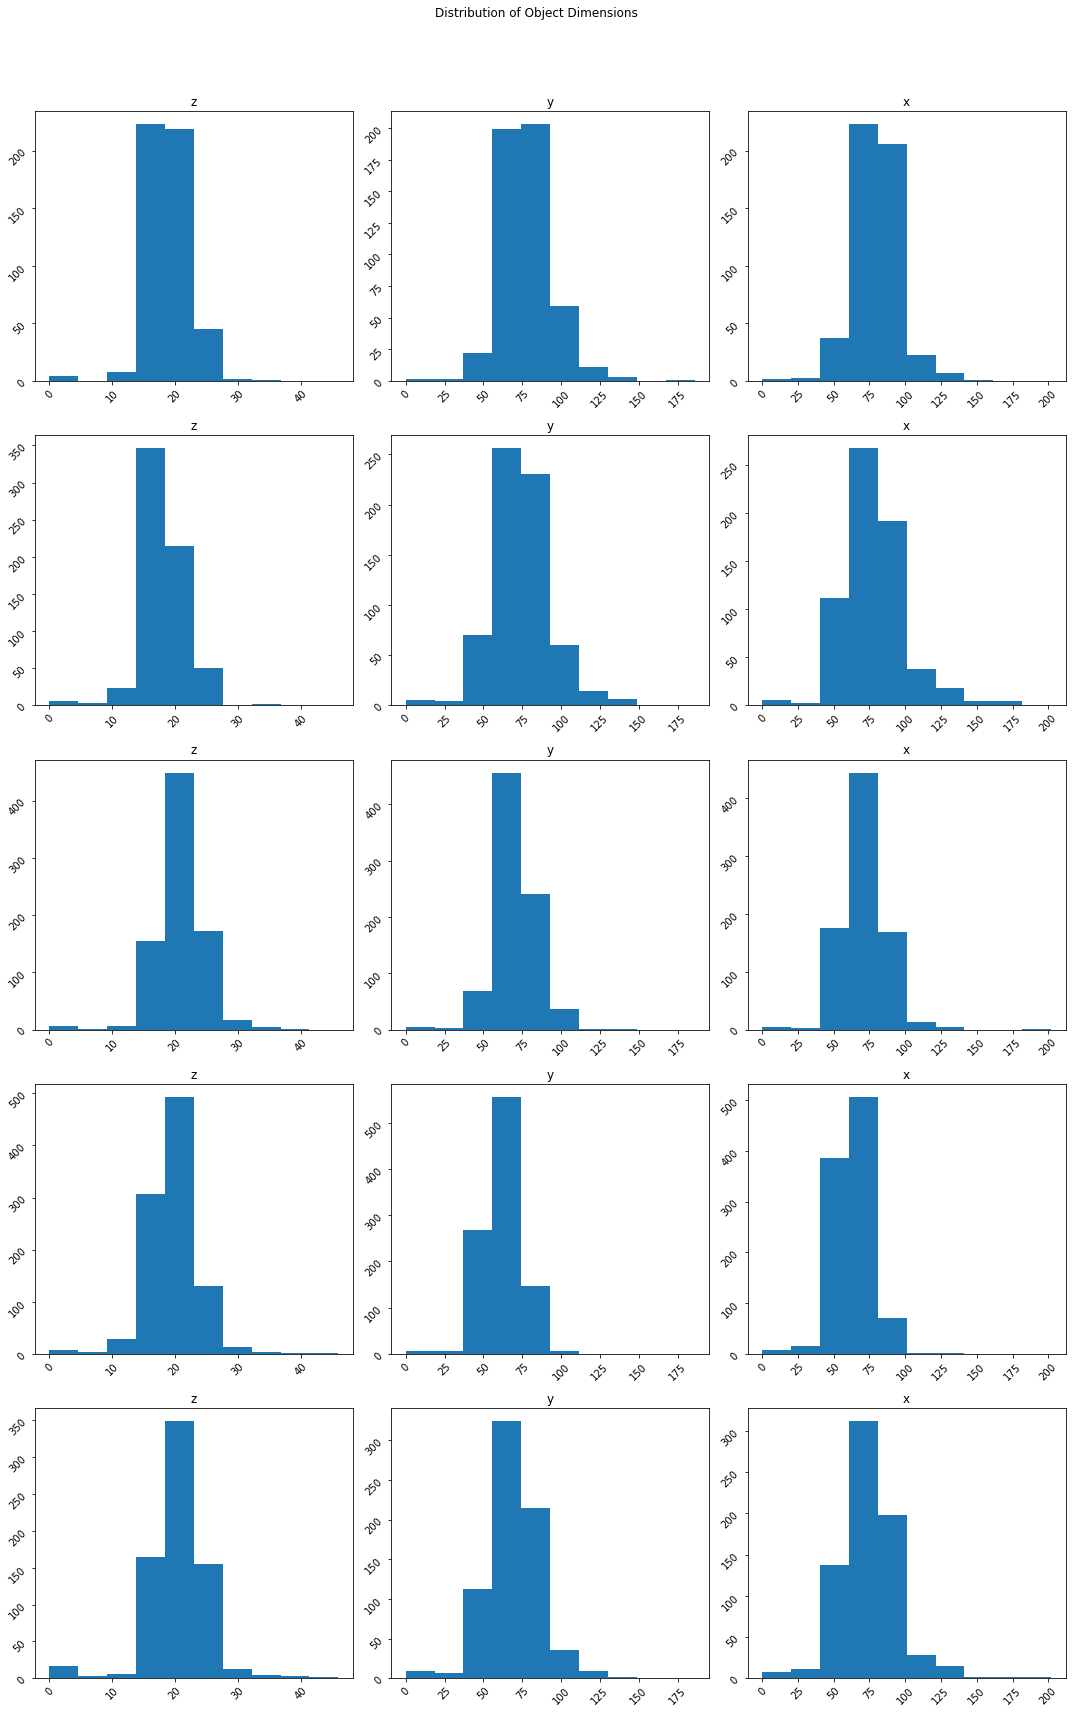

In [12]:
fig, axs = plt.subplots(5, 3, figsize=(15, 25))
dims = ['z', 'y', 'x']

fig.suptitle("Distribution of Object Dimensions")
for idx, extents in enumerate(extents_list):
    ax = axs[idx]
    for dim in range(3):
        ax[dim].hist(extents[:, dim], range=(0, range_maxes[dim]))
        ax[dim].set_title(dims[dim])
#         ax[dim].hist(areas, range=(0, range_max))
#         ax[dim].set_title(pathlist_files[idx])
        ax[dim].tick_params(rotation=45)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Compare to Old Datasets

In [13]:
path_folder = "/g/kreshuk/yu/Datasets/AVijayan2021Ovules/train/"
pathlist_files = get_files_from_folder(path_folder, ext='h5')

['/g/kreshuk/yu/Datasets/AVijayan2021Ovules/train/1135.h5',
 '/g/kreshuk/yu/Datasets/AVijayan2021Ovules/train/1136.h5',
 '/g/kreshuk/yu/Datasets/AVijayan2021Ovules/train/1139.h5',
 '/g/kreshuk/yu/Datasets/AVijayan2021Ovules/train/1170.h5']


In [14]:
anisotropy_list = []
grid_list = []
areas_list = []
extents_list = []

for path_file in pathlist_files:
    regs = file_properties(path_file)
    anisotropy, grid, extents, areas = region_statistics(regs)
    
    anisotropy_list.append(anisotropy)
    grid_list.append(grid)
    areas_list.append(areas)
    extents_list.append(extents)

Load time: 1.5656375885009766
median extents = [16. 30. 31.], anisotropy = (1.9375, 1.0333333333333334, 1.0), grid = (1, 2, 2)
Load time: 1.8358700275421143
median extents = [16. 32. 32.], anisotropy = (2.0, 1.0, 1.0), grid = (1, 2, 2)
Load time: 1.9837143421173096
median extents = [18. 32. 34.], anisotropy = (1.8888888888888888, 1.0625, 1.0), grid = (1, 2, 2)
Load time: 1.6626369953155518
median extents = [16. 28. 30.], anisotropy = (1.875, 1.0714285714285714, 1.0), grid = (1, 2, 2)


In [15]:
range_max = np.max([np.max(areas) for areas in areas_list])

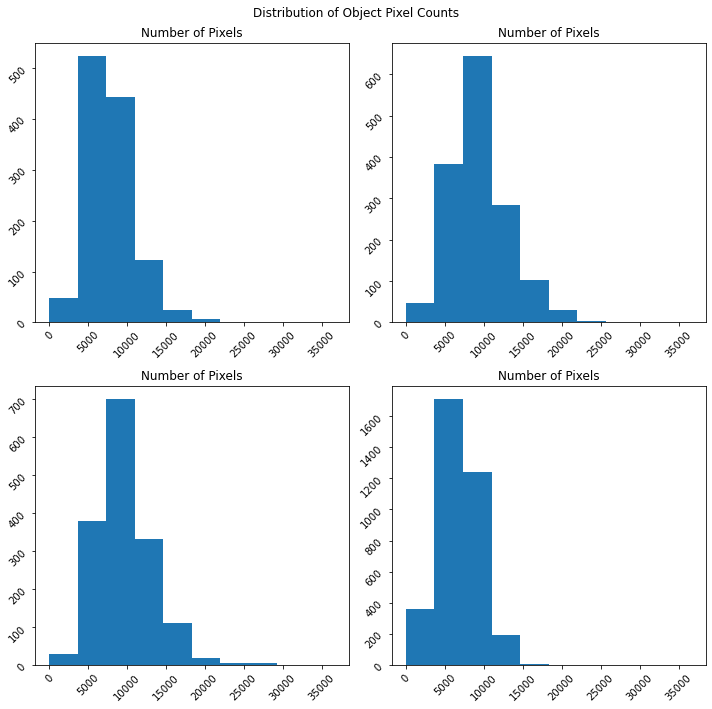

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

fig.suptitle("Distribution of Object Pixel Counts")
axs = axs.flatten()
for idx, areas in enumerate(areas_list):
    axs[idx].hist(areas, range=(0, range_max))
    axs[idx].set_title('Number of Pixels')
    axs[idx].tick_params(rotation=45)

fig.tight_layout()

In [17]:
range_maxes = [np.max([np.max(extents[:, i]) for extents in extents_list]) for i in range(3)]
range_maxes

[50, 84, 120]

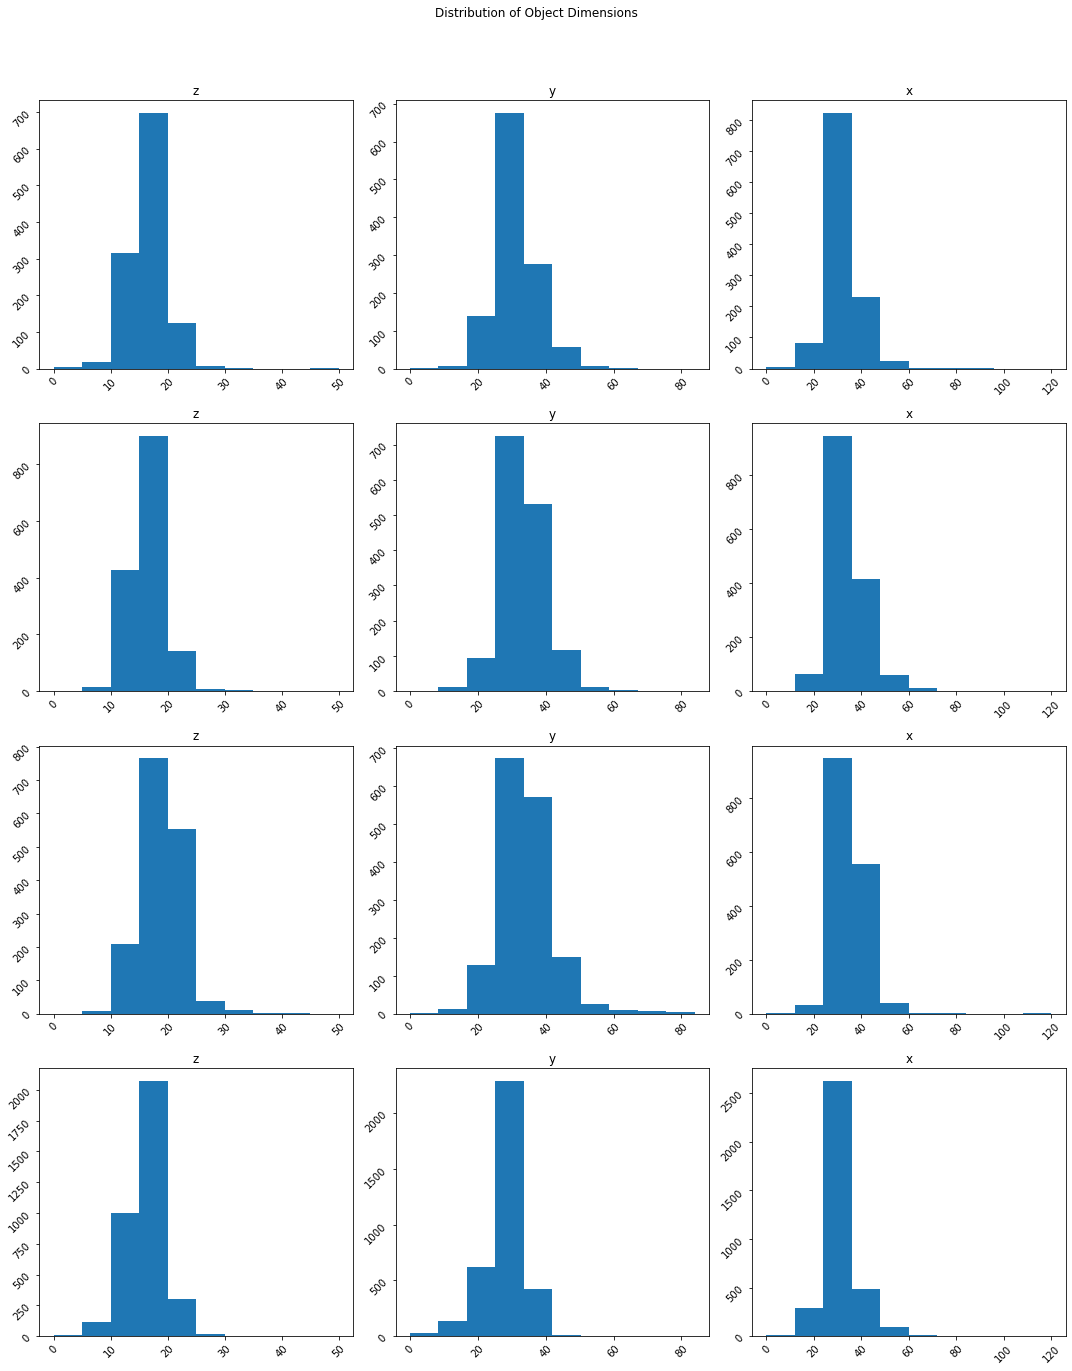

In [18]:
fig, axs = plt.subplots(4, 3, figsize=(15, 20))
dims = ['z', 'y', 'x']

fig.suptitle("Distribution of Object Dimensions")
for idx, extents in enumerate(extents_list):
    ax = axs[idx]
    for dim in range(3):
        ax[dim].hist(extents[:, dim], range=(0, range_maxes[dim]))
        ax[dim].set_title(dims[dim])
#         ax[dim].hist(areas, range=(0, range_max))
#         ax[dim].set_title(pathlist_files[idx])
        ax[dim].tick_params(rotation=45)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])

以下是 draft

['/g/kreshuk/yu/Datasets/TMody2021Ovules/train/1613.h5',
 '/g/kreshuk/yu/Datasets/TMody2021Ovules/train/1614.h5',
 '/g/kreshuk/yu/Datasets/TMody2021Ovules/train/1616.h5',
 '/g/kreshuk/yu/Datasets/TMody2021Ovules/train/1617.h5']
Load time: 3.4869139194488525


AttributeError: 'Rectangle' object has no property 'bin'

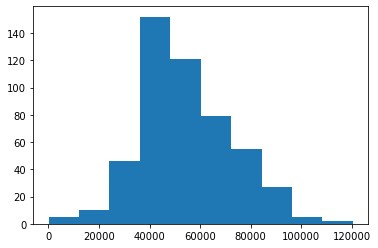

In [19]:
def check_dataset_names(path_file):
    with h5py.File(path_file, 'r') as f:
        print(f.keys())
    return


def get_files_from_folder(path_folder, ext='h5'):
    pathlist_files = glob.glob(path_folder + '/*.' + ext)
    pprint(pathlist_files)
    return(pathlist_files)


def file_properties(path_file):
    with h5py.File(path_file, 'r') as f:
        if 'label' not in f.keys():
            message_err = "'label' dataset must be included in the input HDF5 file! " + \
                          f"Only found the following keys:\n{f.keys()}"
            raise KeyError(message_err)

        time_start = time.time()
        dset = f['label'][:]
        time_end = time.time()
        print(f"Load time: {time_end - time_start}")

        regs = regionprops(dset)

        # properties = [dset.shape, dset.dtype, ]

    return regs


def understand_dataset(path_folder, ext='h5'):
    pathlist_files = get_files_from_folder(path_folder, ext='h5')
    for path_file in pathlist_files:
        file_properties(path_file)
    return


if __name__ == '__main__':
    path_folder = "/g/kreshuk/yu/Datasets/TMody2021Ovules/train"
    pathlist_files = get_files_from_folder(path_folder, ext='h5')
    # understand_dataset(path_folder)
    regs = file_properties(pathlist_files[0])
    extents = np.array([np.array(r.bbox[3:]) - np.array(r.bbox[:3]) for r in regs])
    areas = np.array([r.area for r in regs])
    plt.hist(areas, bin=50)
    print(regs[0].bbox, regs[0].area)
